Analysizing Traffic Accident Data

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Try reading with a different encoding
df = pd.read_csv('accident.csv', encoding='utf-8', encoding_errors='replace')  # or 'ignore'

# Display the first few rows of the dataset to get an overview
df.head()
df.tail()

,STATE,STATENAME,ST_CASE,PEDS,PERNOTMVIT,VE_TOTAL,VE_FORMS,PVH_INVL,PERSONS,PERMVIT,...,NOT_MINNAME,ARR_HOUR,ARR_HOURNAME,ARR_MIN,ARR_MINNAME,HOSP_HR,HOSP_HRNAME,HOSP_MN,HOSP_MNNAME,FATALS
39216,56,Wyoming,560114,0,0,2,2,0,2,2,...,30,11,11:00am-11:59am,35,35,12,12:00pm-12:59pm,4,4,1
39217,56,Wyoming,560115,0,0,1,1,0,1,1,...,Unknown if Notified,99,Unknown EMS Scene Arrival Hour,98,Unknown if Arrived,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1
39218,56,Wyoming,560116,0,0,1,1,0,1,1,...,2,15,3:00pm-3:59pm,7,7,15,3:00pm-3:59pm,27,27,1
39219,56,Wyoming,560117,0,0,1,1,0,1,1,...,24,7,7:00am-7:59am,40,40,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1
39220,56,Wyoming,560118,0,0,1,1,0,4,4,...,6,5,5:00am-5:59am,25,25,6,6:00am-6:59am,45,45,1


In [46]:
df.columns

Index(['STATE', 'STATENAME', 'ST_CASE', 'PEDS', 'PERNOTMVIT', 'VE_TOTAL',
       'VE_FORMS', 'PVH_INVL', 'PERSONS', 'PERMVIT', 'COUNTY', 'COUNTYNAME',
       'CITY', 'CITYNAME', 'MONTH', 'MONTHNAME', 'DAY', 'DAYNAME', 'DAY_WEEK',
       'DAY_WEEKNAME', 'YEAR', 'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME',
       'TWAY_ID', 'TWAY_ID2', 'ROUTE', 'ROUTENAME', 'RUR_URB', 'RUR_URBNAME',
       'FUNC_SYS', 'FUNC_SYSNAME', 'RD_OWNER', 'RD_OWNERNAME', 'NHS',
       'NHSNAME', 'SP_JUR', 'SP_JURNAME', 'MILEPT', 'MILEPTNAME', 'LATITUDE',
       'LATITUDENAME', 'LONGITUD', 'LONGITUDNAME', 'HARM_EV', 'HARM_EVNAME',
       'MAN_COLL', 'MAN_COLLNAME', 'RELJCT1', 'RELJCT1NAME', 'RELJCT2',
       'RELJCT2NAME', 'TYP_INT', 'TYP_INTNAME', 'REL_ROAD', 'REL_ROADNAME',
       'WRK_ZONE', 'WRK_ZONENAME', 'LGT_COND', 'LGT_CONDNAME', 'WEATHER',
       'WEATHERNAME', 'SCH_BUS', 'SCH_BUSNAME', 'RAIL', 'RAILNAME', 'NOT_HOUR',
       'NOT_HOURNAME', 'NOT_MIN', 'NOT_MINNAME', 'ARR_HOUR', 'ARR_HOURNAME',
       'ARR_M

In [9]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
STATE          0
STATENAME      0
ST_CASE        0
PEDS           0
PERNOTMVIT     0
              ..
HOSP_HR        0
HOSP_HRNAME    0
HOSP_MN        0
HOSP_MNNAME    0
FATALS         0
Length: 80, dtype: int64


In [11]:
# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 0


In [13]:
# Drop duplicate rows
df = df.drop_duplicates()
df


,STATE,STATENAME,ST_CASE,PEDS,PERNOTMVIT,VE_TOTAL,VE_FORMS,PVH_INVL,PERSONS,PERMVIT,...,NOT_MINNAME,ARR_HOUR,ARR_HOURNAME,ARR_MIN,ARR_MINNAME,HOSP_HR,HOSP_HRNAME,HOSP_MN,HOSP_MNNAME,FATALS
0,1,Alabama,10001,0,0,2,2,0,3,3,...,47,13,1:00pm-1:59pm,4,4,13,1:00pm-1:59pm,47,47,1
1,1,Alabama,10002,0,0,2,2,0,5,5,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,2
2,1,Alabama,10003,0,0,1,1,0,2,2,...,33,1,1:00am-1:59am,50,50,99,Unknown,99,Unknown EMS Hospital Arrival Time,1
3,1,Alabama,10004,0,0,1,1,0,1,1,...,48,15,3:00pm-3:59pm,9,9,15,3:00pm-3:59pm,44,44,1
4,1,Alabama,10005,1,1,1,1,0,1,1,...,48,18,6:00pm-6:59pm,54,54,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39216,56,Wyoming,560114,0,0,2,2,0,2,2,...,30,11,11:00am-11:59am,35,35,12,12:00pm-12:59pm,4,4,1
39217,56,Wyoming,560115,0,0,1,1,0,1,1,...,Unknown if Notified,99,Unknown EMS Scene Arrival Hour,98,Unknown if Arrived,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1
39218,56,Wyoming,560116,0,0,1,1,0,1,1,...,2,15,3:00pm-3:59pm,7,7,15,3:00pm-3:59pm,27,27,1
39219,56,Wyoming,560117,0,0,1,1,0,1,1,...,24,7,7:00am-7:59am,40,40,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1


In [15]:

# Drop rows with missing values (if necessary)
df_cleaned = df.dropna()
df_cleaned


,STATE,STATENAME,ST_CASE,PEDS,PERNOTMVIT,VE_TOTAL,VE_FORMS,PVH_INVL,PERSONS,PERMVIT,...,NOT_MINNAME,ARR_HOUR,ARR_HOURNAME,ARR_MIN,ARR_MINNAME,HOSP_HR,HOSP_HRNAME,HOSP_MN,HOSP_MNNAME,FATALS
275,1,Alabama,10276,0,0,2,2,0,3,3,...,47,13,1:00pm-1:59pm,52,52,99,Unknown,99,Unknown EMS Hospital Arrival Time,1
295,1,Alabama,10297,0,0,2,2,0,4,4,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),2
403,1,Alabama,10405,0,0,1,1,0,1,1,...,55,7,7:00am-7:59am,59,59,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1
520,1,Alabama,10525,0,0,2,2,0,2,2,...,14,5,5:00am-5:59am,25,25,99,Unknown,99,Unknown EMS Hospital Arrival Time,1
1298,4,Arizona,40322,0,0,2,2,0,2,2,...,15,7,7:00am-7:59am,30,30,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35718,48,Texas,483507,0,0,1,1,0,5,5,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1
35860,48,Texas,483650,0,0,2,2,0,5,5,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1
36533,49,Utah,490240,0,0,1,1,0,1,1,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1
37393,51,Virginia,510748,0,0,2,2,0,2,2,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1


In [17]:
# Assuming there's a 'Date' column in the dataset
if 'Date' in df_cleaned.columns:
    df_cleaned['Year'] = df_cleaned['Date'].dt.year
    df_cleaned['Month'] = df_cleaned['Date'].dt.month

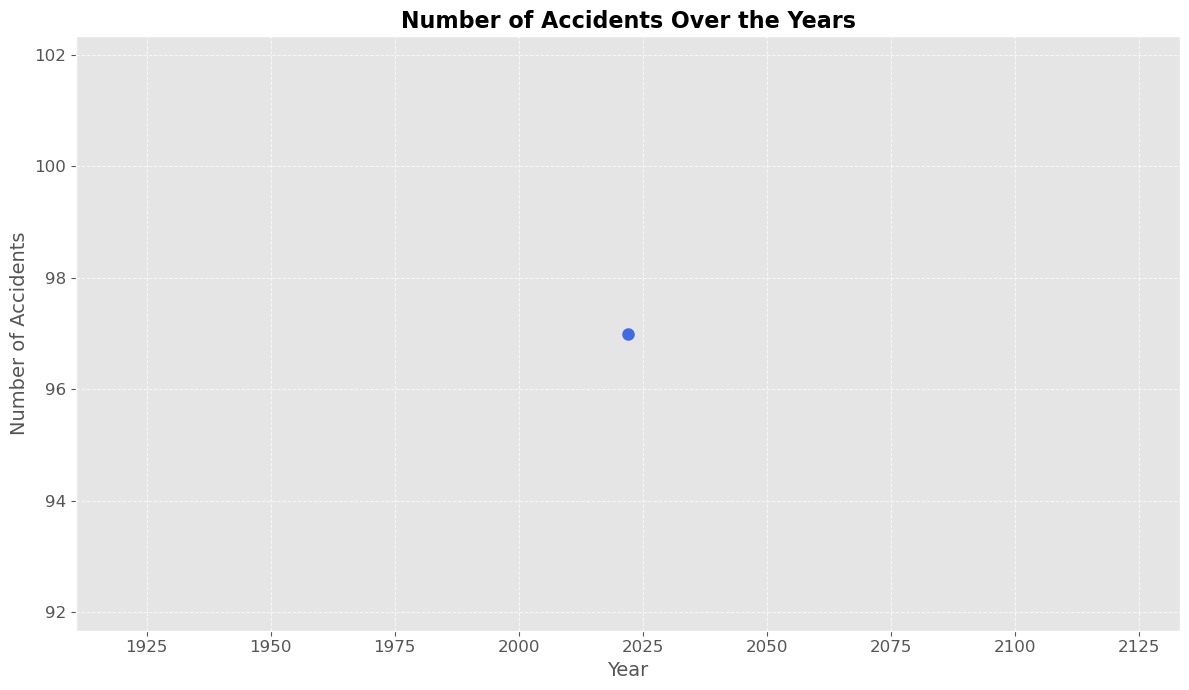

In [19]:
import matplotlib.pyplot as plt

# Create figure and axis with larger size and using a built-in style (e.g., 'ggplot')
plt.figure(figsize=(12, 7))
plt.style.use('ggplot')  # Using ggplot style instead of seaborn

# Plotting the number of accidents over the years with additional visual improvements
df_cleaned.groupby('YEAR').size().plot(kind='line', marker='o', color='royalblue', linestyle='-', linewidth=2, markersize=8)

# Add a title and labels with customized font size and boldness
plt.title('Number of Accidents Over the Years', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)

# Add a grid for readability and customize its appearance
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Customize the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

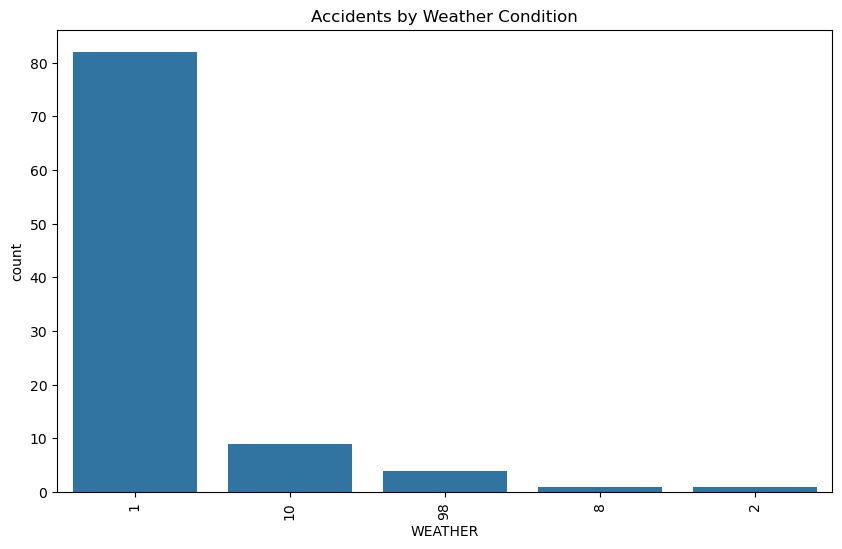

In [50]:
# Assuming there's a 'Weather Condition' and 'Accident Severity' or 'Accidents' column
plt.figure(figsize=(10,6))
sns.countplot(x='WEATHER', data=df_cleaned, order=df_cleaned['WEATHER'].value_counts().index)
plt.title('Accidents by Weather Condition')
plt.xticks(rotation=90)
plt.show()

# If there are numerical weather features, we can also calculate correlation
# Example: Weather temperature and accidents
if 'Temperature' in df_cleaned.columns:
    correlation_matrix = df_cleaned[['Temperature', 'Accident Count']].corr()
    print("Correlation matrix between temperature and accidents:")
    print(correlation_matrix)

In [84]:
df_cleaned.columns

Index(['STATE', 'STATENAME', 'ST_CASE', 'PEDS', 'PERNOTMVIT', 'VE_TOTAL',
       'VE_FORMS', 'PVH_INVL', 'PERSONS', 'PERMVIT', 'COUNTY', 'COUNTYNAME',
       'CITY', 'CITYNAME', 'MONTH', 'MONTHNAME', 'DAY', 'DAYNAME', 'DAY_WEEK',
       'DAY_WEEKNAME', 'YEAR', 'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME',
       'TWAY_ID', 'TWAY_ID2', 'ROUTE', 'ROUTENAME', 'RUR_URB', 'RUR_URBNAME',
       'FUNC_SYS', 'FUNC_SYSNAME', 'RD_OWNER', 'RD_OWNERNAME', 'NHS',
       'NHSNAME', 'SP_JUR', 'SP_JURNAME', 'MILEPT', 'MILEPTNAME', 'LATITUDE',
       'LATITUDENAME', 'LONGITUD', 'LONGITUDNAME', 'HARM_EV', 'HARM_EVNAME',
       'MAN_COLL', 'MAN_COLLNAME', 'RELJCT1', 'RELJCT1NAME', 'RELJCT2',
       'RELJCT2NAME', 'TYP_INT', 'TYP_INTNAME', 'REL_ROAD', 'REL_ROADNAME',
       'WRK_ZONE', 'WRK_ZONENAME', 'LGT_COND', 'LGT_CONDNAME', 'WEATHER',
       'WEATHERNAME', 'SCH_BUS', 'SCH_BUSNAME', 'RAIL', 'RAILNAME', 'NOT_HOUR',
       'NOT_HOURNAME', 'NOT_MIN', 'NOT_MINNAME', 'ARR_HOUR', 'ARR_HOURNAME',
       'ARR_M

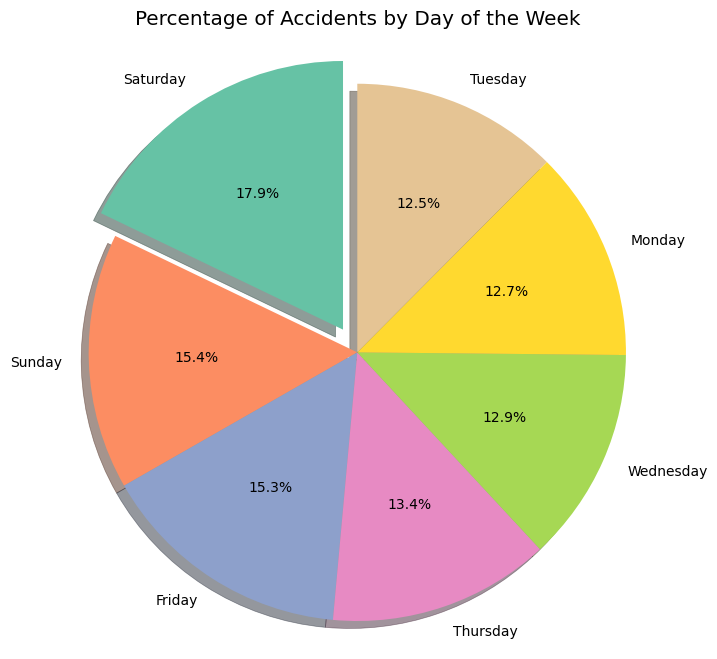

In [49]:
# Count accidents by day of the week
accidents_by_weekday = df['DAY_WEEKNAME'].value_counts()

# Identify the index of the largest slice to explode it
explode = [0.1 if i == accidents_by_weekday.idxmax() else 0 for i in accidents_by_weekday.index]

# Plot a pie chart with the highest percentage exploded
plt.figure(figsize=(8, 8))
plt.pie(accidents_by_weekday, labels=accidents_by_weekday.index, autopct='%1.1f%%', 
        colors=sns.color_palette('Set2'), explode=explode, startangle=90, shadow=True)

plt.title('Percentage of Accidents by Day of the Week')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.show()


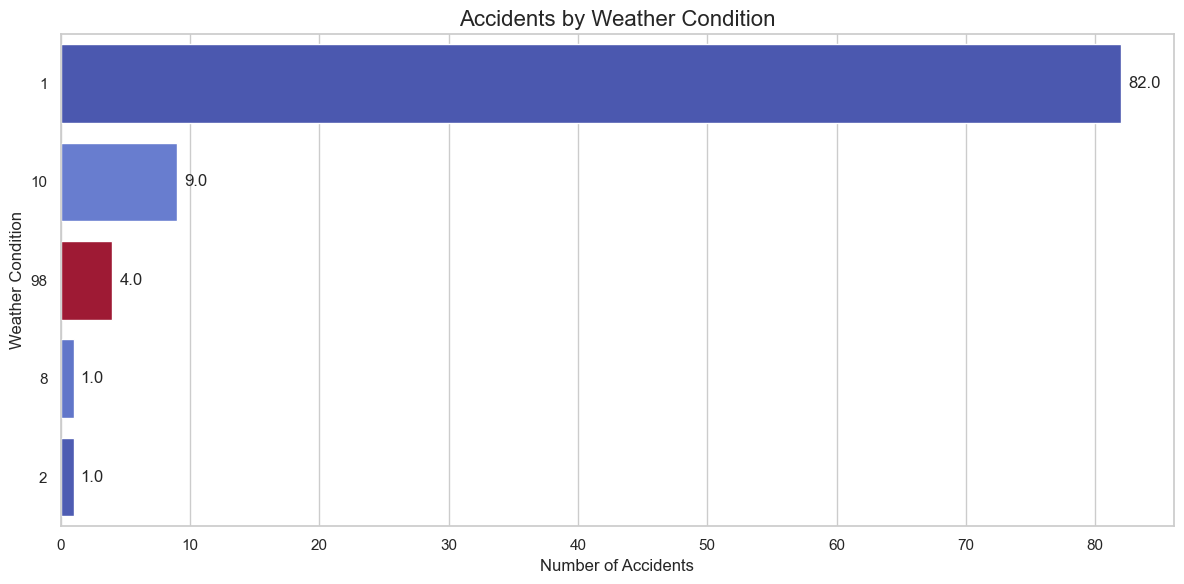

In [62]:
# Setting a style for better visual appeal
sns.set(style="whitegrid")

# Plotting accidents by weather condition
plt.figure(figsize=(12,6))
ax = sns.countplot(
    y='WEATHER',  # switching to y for better display if categories are many
    data=df_cleaned, 
    hue='WEATHER',  # Assigning 'Weather Condition' to hue to prevent the deprecation warning
    order=df_cleaned['WEATHER'].value_counts().index,
    palette='coolwarm',
    legend=False  # Disable the legend since we're not using different hues
)
plt.title('Accidents by Weather Condition', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Weather Condition', fontsize=12)
plt.tight_layout()

# Adding value labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()


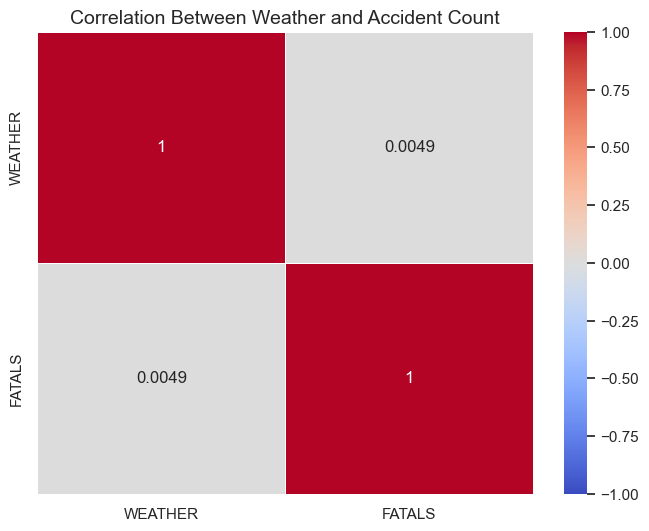

In [92]:
if 'WEATHER' in df_cleaned.columns:
    plt.figure(figsize=(8,6))
    
# Calculating correlation
correlation_matrix = df_cleaned[['WEATHER','FATALS']].corr()
    
# Plotting the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Between Weather and Accident Count', fontsize=14)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_13488\2478576827.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_accidents.values, y=state_accidents.index, palette="viridis")


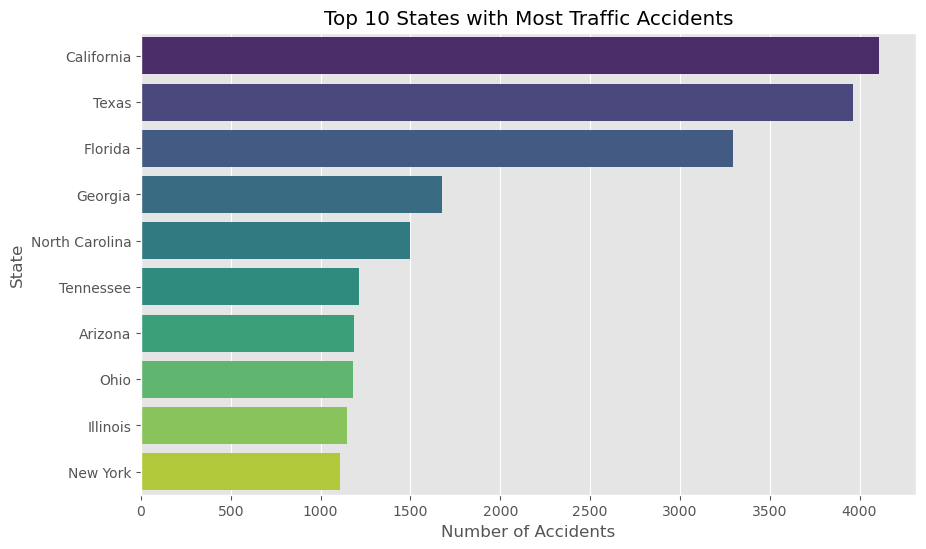

In [27]:
# Group by state and count the number of accidents
state_accidents = df['STATENAME'].value_counts().head(10)

# Plot the top 10 states with most traffic accidents
plt.figure(figsize=(10, 6))
sns.barplot(x=state_accidents.values, y=state_accidents.index, palette="viridis")
plt.title('Top 10 States with Most Traffic Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('State')
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_13488\92584102.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_accidents.values, y=weather_accidents.index, palette="magma")


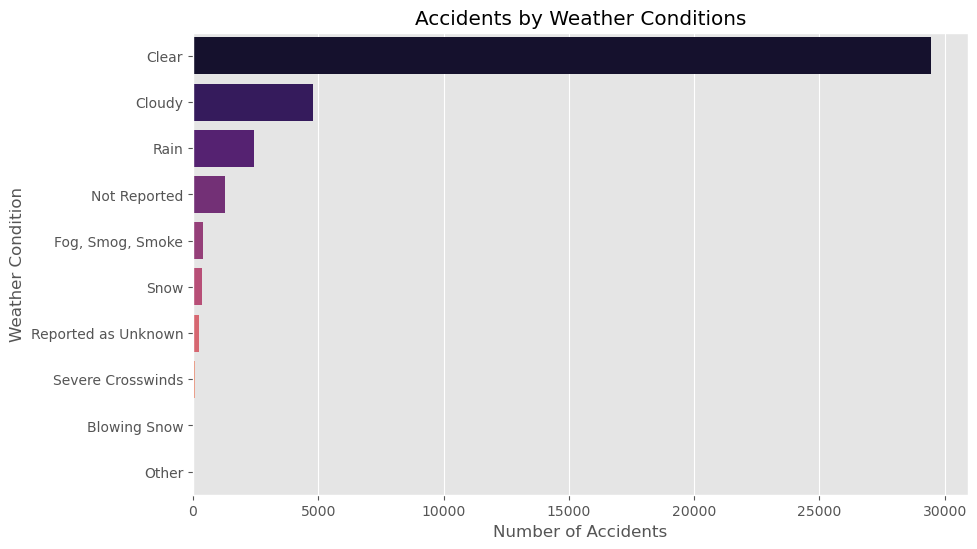

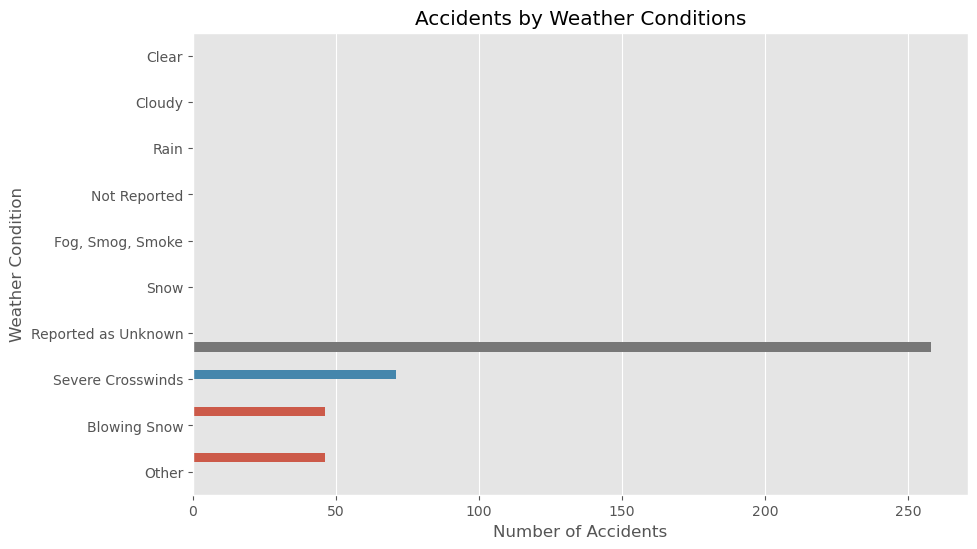

In [41]:
# Group by weather conditions and count accidents
weather_accidents = df['WEATHERNAME'].value_counts().head(10)

# Plot accidents by weather conditions
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_accidents.values, y=weather_accidents.index, palette="magma")
plt.title('Accidents by Weather Conditions')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.show()

# Create categories based on accident counts for hue (optional)
weather_accidents_df = weather_accidents.reset_index()
weather_accidents_df.columns = ['Weather', 'Accidents']
weather_accidents_df['Severity'] = pd.cut(weather_accidents_df['Accidents'], bins=[0, 50, 100, 200, 300], labels=['Low', 'Moderate', 'High', 'Very High'])

# Plot with hue assigned to 'Severity' and set legend=False
plt.figure(figsize=(10, 6))
sns.barplot(x='Accidents', y='Weather', hue='Severity', data=weather_accidents_df, legend=False)
plt.title('Accidents by Weather Conditions')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.show()
